<a href="https://colab.research.google.com/github/zeynepsenatatli/NeuralNetworkExercises/blob/main/UE04_C13E10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

 a) *Download the Large Movie Review Dataset, which contains 50,000 movies reviews from the Internet Movie Database. The data is organized in two directories, train and test, each containing a pos subdirectory with 12,500 positive reviews and a neg subdirectory with 12,500 negative reviews. Each review is stored in a separate text file.*



In [ ]:
from pathlib import Path
import tensorflow as tf

root = "https://ai.stanford.edu/~amaas/data/sentiment/"
filename = "aclImdb_v1.tar.gz"
filepath = tf.keras.utils.get_file(filename, root + filename, extract=True,
                                   cache_dir=".")
path = Path(filepath).with_name("aclImdb")
path

PosixPath('datasets/aclImdb')

In [ ]:
def review_paths(dirpath):
    return [str(path) for path in dirpath.glob("*.txt")]

train_pos = review_paths(path / "train" / "pos")
train_neg = review_paths(path / "train" / "neg")
test_valid_pos = review_paths(path / "test" / "pos")
test_valid_neg = review_paths(path / "test" / "neg")

len(train_pos), len(train_neg), len(test_valid_pos), len(test_valid_neg)

(12500, 12500, 12500, 12500)

In [ ]:
train_pos[0]

'datasets/aclImdb/train/pos/1924_10.txt'

b) *Split the test set into a validation set (15,000) and a test set (10,000).*

In [ ]:
np.random.shuffle(test_valid_pos)
np.random.shuffle(test_valid_neg)

test_pos = test_valid_pos[:5000]
test_neg = test_valid_neg[:5000]
valid_pos = test_valid_pos[5000:]
valid_neg = test_valid_neg[5000:]

In [ ]:
print(len(test_pos))
print(len(test_neg))

5000
5000


In [ ]:
test_neg[0]

'datasets/aclImdb/test/neg/7829_4.txt'

In [ ]:
with open(test_neg[0]) as review_file:
                a = review_file.read()

print(a)

Olivier Assayas' film stars Asia Argento as a woman who had a relationship with Michael Madsen. Madsen is a business man who's in financial trouble. In desperation he is going to sell his share of a business to a company called Golden Eagle, a company from the Far East. As Madsen begins his moves away from his company Asia Argento returns to his life. The pair had a torrid love affair that included her doing business favors for Madsen (with said Golden Eagle). Once Argento enters the film the film follows her as we see the tangled web she's woven and how the complications spin dangerously and violently out of control.<br /><br />I'm not a fan. Actually I was quite bored as the film seems to go from pillar to post for much of the first hour during which I kept wondering what the point was other than to provide a meaty role for Argento. Argento, daughter of director Dario Argento and a director in her own right, is a unique actress. At times stunningly good, she is more often then not go

c) *Use tf.data to create an efficient dataset for each set.*

In [ ]:
def imdb_dataset(filepaths_pos, filepaths_neg):
    reviews = []
    labels = []
    for filepaths, label in ((filepaths_neg, 0), (filepaths_pos, 1)):
        for filepath in filepaths:
            with open(filepath) as review_file:
                reviews.append(review_file.read())
            labels.append(label)
    return tf.data.Dataset.from_tensor_slices(
        (tf.constant(reviews), tf.constant(labels)))

In [ ]:
train_set = imdb_dataset(train_pos, train_neg)

In [ ]:
dataset_size = tf.data.experimental.cardinality(train_set).numpy()
print(dataset_size)

25000


In [ ]:
train_set = train_set.shuffle(buffer_size=25000)

In [ ]:
for X, y in train_set.take(3):
    print(X)
    print(y)
    print()

tf.Tensor(b"Yes, Marie Dresler drinks prune juice that she thinks is poison and she exits running.<br /><br />Dresler is good. Never my cup of tea but she is a solid performer who surely holds the screen.<br /><br />I watched this for Polly Moran, whom I've seen elsewhere. Here, Moran is OK -- just OK -- as Dressler's shrewish friend/foe. Too bad she has sunk into nearly total oblivion.<br /><br />The plot is good hearted. Bad guys try to rob the townspeople. Dressler triumphs and all ends well.<br /><br />I do wonder about the central plot mechanism: bonds. This came out during the Depression so maybe everyone was familiar with bonds and what they can do if used well and if used wrongly. I, however, not of that era, am vaguely familiar with them. They're like stocks only different, right? It seems odd to build a story about The Little Man around a somewhat sophisticated monetary entity.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)

tf.Tensor(b"My sincere advice to all

In [ ]:
train_set = train_set.batch(32).prefetch(1)
valid_set = imdb_dataset(valid_pos, valid_neg).batch(32).prefetch(1)
test_set = imdb_dataset(test_pos, test_neg).batch(32).prefetch(1)

In [ ]:
for X, y in test_set.take(1):
    print(X)
    print(y)
    print()

tf.Tensor(
[b'Olivier Assayas\' film stars Asia Argento as a woman who had a relationship with Michael Madsen. Madsen is a business man who\'s in financial trouble. In desperation he is going to sell his share of a business to a company called Golden Eagle, a company from the Far East. As Madsen begins his moves away from his company Asia Argento returns to his life. The pair had a torrid love affair that included her doing business favors for Madsen (with said Golden Eagle). Once Argento enters the film the film follows her as we see the tangled web she\'s woven and how the complications spin dangerously and violently out of control.<br /><br />I\'m not a fan. Actually I was quite bored as the film seems to go from pillar to post for much of the first hour during which I kept wondering what the point was other than to provide a meaty role for Argento. Argento, daughter of director Dario Argento and a director in her own right, is a unique actress. At times stunningly good, she is more

d) *Create a binary classification model, using a TextVectorization layer to preprocess each review.*

In [ ]:
max_tokens = 1000
sample_reviews = train_set.map(lambda review, label: review)

In [ ]:
for review in sample_reviews.take(1):
    print(review)

tf.Tensor(
[b"This is possibly the worst fencing, sword-fighting, movie ever made. That is not just because the so called sports fencing is poor but because the plot, characters are so weak that they've got to throw in a semi nude sex scene and, later, supposed group dancing around a fencing scene in the fencing club trying, I suppose to maintain audience interest. What a waste of F. Murray Abraham's talents. You're better served with overblown swashbuckling movies like Zorro, Scaramouche, anything that has Basil Rathbone as the villain. As a fencer myself I recognize the near impossibility of capturing fencing as a sport on film, but if it ever happens it's got to have fresher, better drawn characters and a plot with more depth."
 b'::POTENTIAL SPOILERS::<br /><br />Man, this movie was awful. A Catholic/superstitious/suspense thriller it goes over already well tread ground from previous movies.<br /><br />The doubting priest. Sex and the priesthood. Politics and religion. Church hypoc

In [ ]:
text_vectorization = tf.keras.layers.TextVectorization(max_tokens=max_tokens, output_mode="tf_idf")
text_vectorization.adapt(sample_reviews)

In [ ]:
text_vectorization.get_vocabulary()[:20]

['[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that',
 'br',
 'was',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'film']

Train the model

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    text_vectorization,
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
782/782 [==============================] - 11s 12ms/step - loss: 0.4253 - accuracy: 0.8236 - val_loss: 0.4046 - val_accuracy: 0.8373
Epoch 2/5
782/782 [==============================] - 8s 11ms/step - loss: 0.3628 - accuracy: 0.8533 - val_loss: 0.3512 - val_accuracy: 0.8554
Epoch 3/5
782/782 [==============================] - 8s 11ms/step - loss: 0.3214 - accuracy: 0.8684 - val_loss: 0.3688 - val_accuracy: 0.8471
Epoch 4/5
782/782 [==============================] - 10s 12ms/step - loss: 0.2743 - accuracy: 0.8900 - val_loss: 0.3584 - val_accuracy: 0.8509
Epoch 5/5
782/782 [==============================] - 10s 12ms/step - loss: 0.2167 - accuracy: 0.9129 - val_loss: 0.3830 - val_accuracy: 0.8483


e) *Add an Embedding layer and compute the mean embedding for each review, multiplied by the square root of the number of words (see Chapter 16). This rescaled mean embedding can then be passed to the rest of your model.*

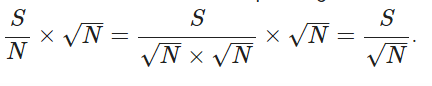

In [ ]:
def compute_mean_embedding(inputs):
    not_pad = tf.math.count_nonzero(inputs, axis=-1)
    n_words = tf.math.count_nonzero(not_pad, axis=-1, keepdims=True)
    sqrt_n_words = tf.math.sqrt(tf.cast(n_words, tf.float32))
    print(tf.reduce_sum(inputs, axis=1))
    return tf.reduce_sum(inputs, axis=1) / sqrt_n_words

In [ ]:
another_example = tf.constant([[[1., 2., 3.], [4., 5., 0.], [0., 0., 0.]],
                               [[6., 0., 0.], [0., 0., 0.], [0., 0., 0.]]])
compute_mean_embedding(another_example)

tf.Tensor(
[[5. 7. 3.]
 [6. 0. 0.]], shape=(2, 3), dtype=float32)


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[3.535534 , 4.9497476, 2.1213205],
       [6.       , 0.       , 0.       ]], dtype=float32)>

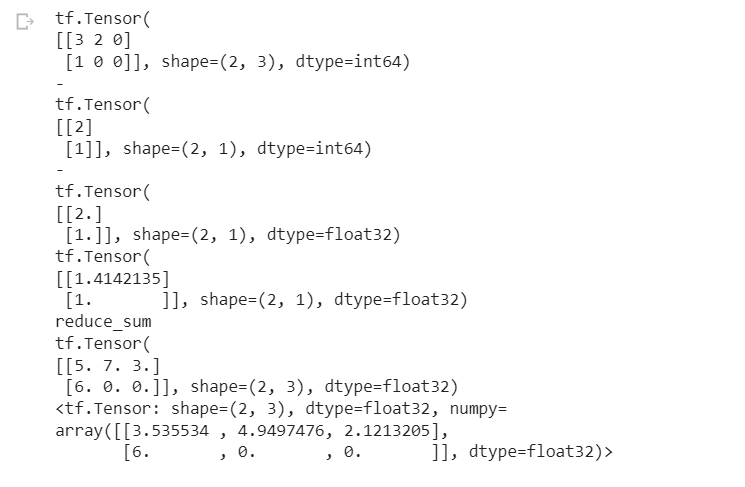

In [ ]:
embedding_size = 20
tf.random.set_seed(42)

text_vectorization = tf.keras.layers.TextVectorization(
    max_tokens=max_tokens, output_mode="int")
text_vectorization.adapt(sample_reviews)

# for review in sample_reviews.take(1):
#     print(review)

In [ ]:
model = tf.keras.Sequential([
    text_vectorization,
    tf.keras.layers.Embedding(input_dim=max_tokens,
                              output_dim=embedding_size,
                              mask_zero=True),  # <pad> tokens => zero vectors
    tf.keras.layers.Lambda(compute_mean_embedding),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

Tensor("lambda_2/Sum:0", shape=(None, 20), dtype=float32)


f) *Train the model and see what accuracy you get. Try to optimize your pipelines to make training as fast as possible.*

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
Tensor("sequential_4/lambda_2/Sum:0", shape=(None, 20), dtype=float32)
Tensor("sequential_4/lambda_2/Sum:0", shape=(None, 20), dtype=float32)
782/782 [==============================] - 13s 15ms/step - loss: 0.2795 - accuracy: 0.8782 - val_loss: 0.3311 - val_accuracy: 0.8571
Epoch 2/5
782/782 [==============================] - 12s 15ms/step - loss: 0.2771 - accuracy: 0.8798 - val_loss: 0.3674 - val_accuracy: 0.8458
Epoch 3/5
782/782 [==============================] - 12s 15ms/step - loss: 0.2736 - accuracy: 0.8820 - val_loss: 0.3361 - val_accuracy: 0.8567
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.2696 - accuracy: 0.8842 - val_loss: 0.3778 - val_accuracy: 0.8383
Epoch 5/5
782/782 [==============================] - 17s 22ms/step - loss: 0.2671 - accuracy: 0.8829 - val_loss: 0.3436 - val_accuracy: 0.8539


In [ ]:
model.evaluate(test_set)

313/313 [==============================] - 3s 10ms/step - loss: 0.3306 - accuracy: 0.8618


[0.33063405752182007, 0.8618000149726868]

g) *Use TFDS to load the same dataset more easily: tfds.load("imdb_reviews").*

In [ ]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="imdb_reviews")
train_set, test_set = datasets["train"], datasets["test"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBI8CT2/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBI8CT2/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteBI8CT2/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for example in train_set.take(1):
    print(example["text"])
    print(example["label"])

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
